In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter

In [2]:
a = False

In [3]:
if not a:
    a = not a
    os.chdir('..')
df = pd.read_csv(r'data\stack-overflow-developer-survey-2024\survey_results_public.csv')
schema_df = pd.read_csv(r'data\stack-overflow-developer-survey-2024\survey_results_schema.csv')

<div style="text-align: center; font-size: 60px"><b>Stack Overflow 2024 Developer Survey Analysis</b></div>


<span style="color: red;">
Welcome to the Stack Overflow 2024 Developer Survey Analysis. This presentation provides insights into the latest trends, technologies, and demographics of the developer community based on the responses from the annual Stack Overflow Developer Survey. We will explore various aspects such as the most popular programming languages, developer job satisfaction, and emerging technologies. Let's dive into the data and uncover the key findings from this year's survey</span>

# Insights Covered

**Demographics:**  
    Analysis of age, gender, and geographical distribution of developers.  
**Tools and technologies:**  
    Overview of the most popular programming languages, frameworks, and tools used by developers.  
**Work preferences and habits:**  
    Insights into developers' work environments, job satisfaction, and preferred work styles.  

In [4]:
df.shape

(65437, 114)

In [5]:
countries = df['Country'].unique()
print(len(countries))



186


# Survey Scope

**Participants:**  
Over 65,000 participants from around the globe.  
**Regions:**  
Developers from 186 countries contributed to the survey.  
**Age Groups:**  
Passion transcends age, with participants ranging from under 18 to over 65 years old.  


# Developer Demographics

In this section, we will explore the demographic characteristics of the survey respondents. This includes an analysis of their age distribution, gender, country of residence, and educational background. Understanding the demographics of the developer community helps us gain insights into the diversity and representation within the tech industry.

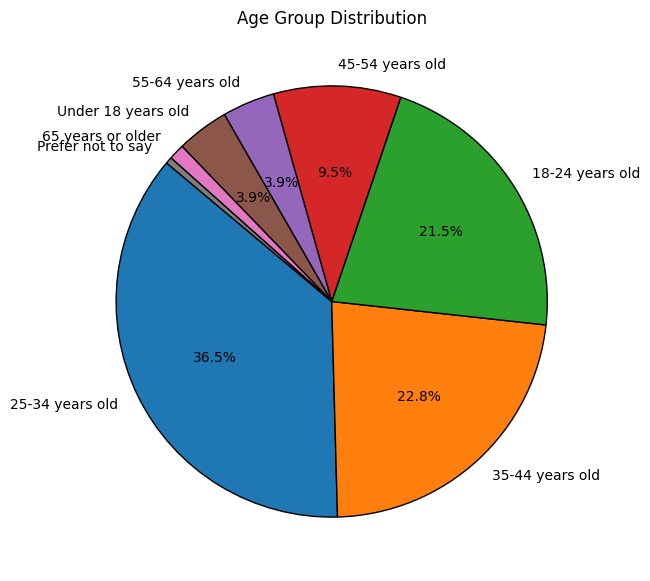

In [6]:
data = (df['Age'].value_counts())

def func(pct, allvalues):
    absolute = round(pct / 100.*sum(allvalues), 0)
    if pct < 2:  
        return ''
    else:
        return f'{pct:.1f}%'

data.plot.pie(autopct=lambda pct: func(pct, data.values), figsize=(7, 7), wedgeprops={'edgecolor': 'black'}, startangle=140)

plt.title('Age Group Distribution')
plt.ylabel('')  
plt.legend().set_visible(False)  
plt.show()


This chart illustrates the distribution of age groups within the developer community.  

   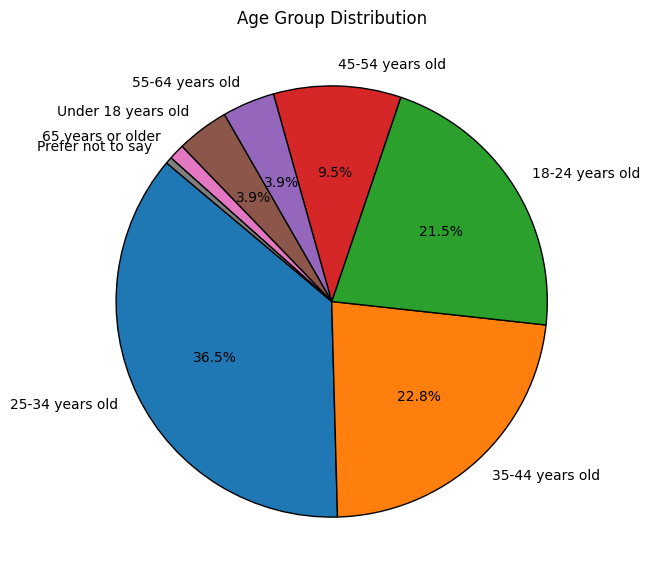

# Key Insights

- The majority of the developer community is composed of three age groups: 25-34, 35-44, and 18-24 years old. Together, these groups make up almost 81% of the developer community.  
- The largest age group of developers falls within the 25-34 age range, followed by those aged 35-44.  
- The smallest age groups are: under 18 years old, 55-64 years and 65 years or older.  

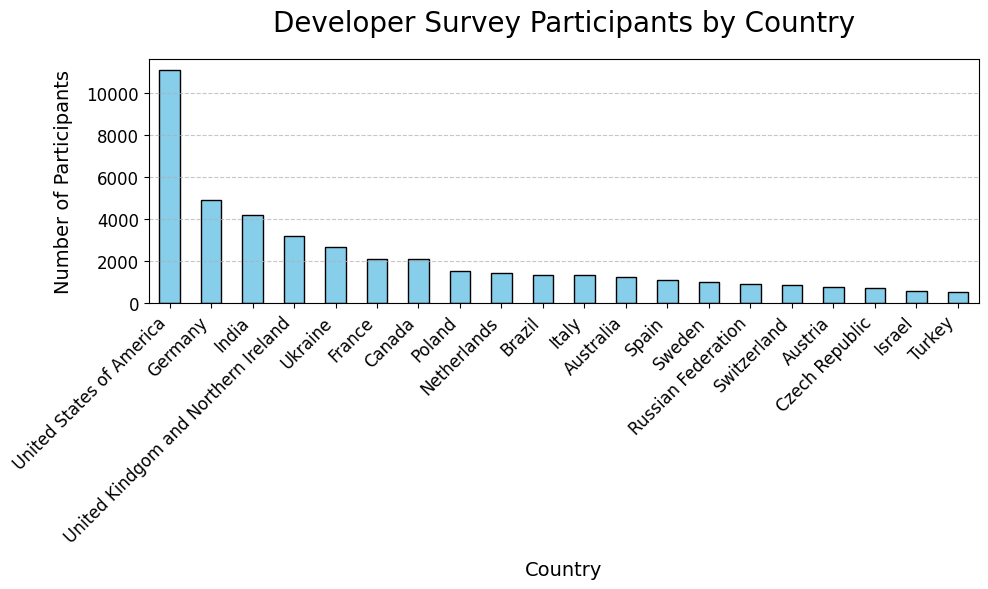

In [7]:
data = df['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kindgom and Northern Ireland').value_counts().head(20)

plt.figure(figsize=(10, 6))
data.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Developer Survey Participants by Country", fontsize=20, pad=20)
plt.xlabel("Country", fontsize=14, labelpad=10)
plt.ylabel("Number of Participants", fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12, ha='right') 
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

<span style="font-size: 30px; line-height: 1.2; margin-bottom: 0; font-weight: bold;">Geographical Distribution</span>

<span style="font-size: 18px; line-height: 1.2; margin-top: 0;">Here we will see the countries from which the survey respondents hail. Understanding the geographical distribution of developers provides insights into the global reach and diversity of the developer community.</span>


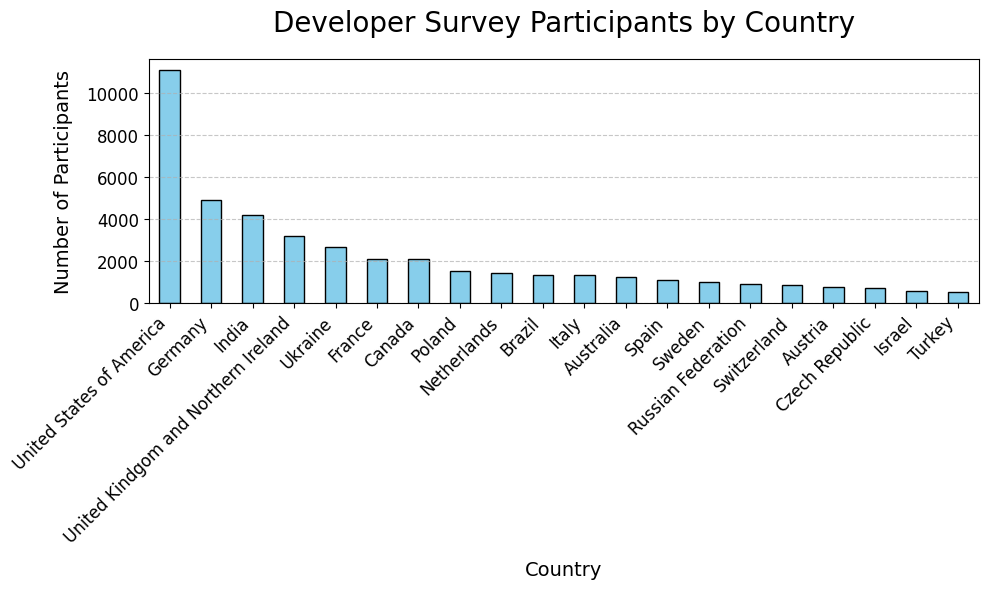

# Key Insights

- The majority of developers who participated in the survey are from the United States, with over 10,000 respondents, more than double the number from Germany, which has over 4,000 respondents.  
- Germany is followed closely by India, with a slightly smaller number of respondents.  
- With the significant difference in population of Germany and India, the outcomes of this survey surely are unpredictable.  

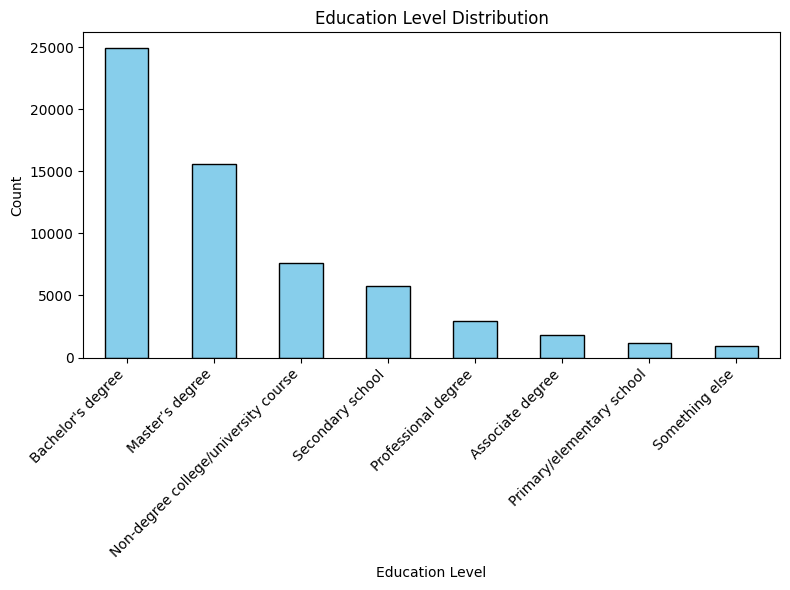

In [8]:
import matplotlib.pyplot as plt

replacement_dict = {
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': "Bachelor's degree",
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': "Master’s degree",
    'Some college/university study without earning a degree': "Non-degree college/university course",
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': "Secondary school",
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': "Professional degree",
    'Associate degree (A.A., A.S., etc.)': "Associate degree"
}

data = df['EdLevel'].value_counts()
data = data.rename(index=replacement_dict)

data.plot(
    kind='bar',
    figsize=(8, 6),
    color='skyblue',
    edgecolor='black',
    title='Education Level Distribution'
)

plt.xlabel('Education Level') 
plt.ylabel('Count')          
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


<span style="font-size: 30px; line-height: 1.2; margin-bottom: 0; font-weight: bold;">Education Levels  </span>

<span style="font-size: 18px; line-height: 1.2; margin-top: 0;">In this part we will discuss what education level is pursued by the various developers taking the survey
</span>

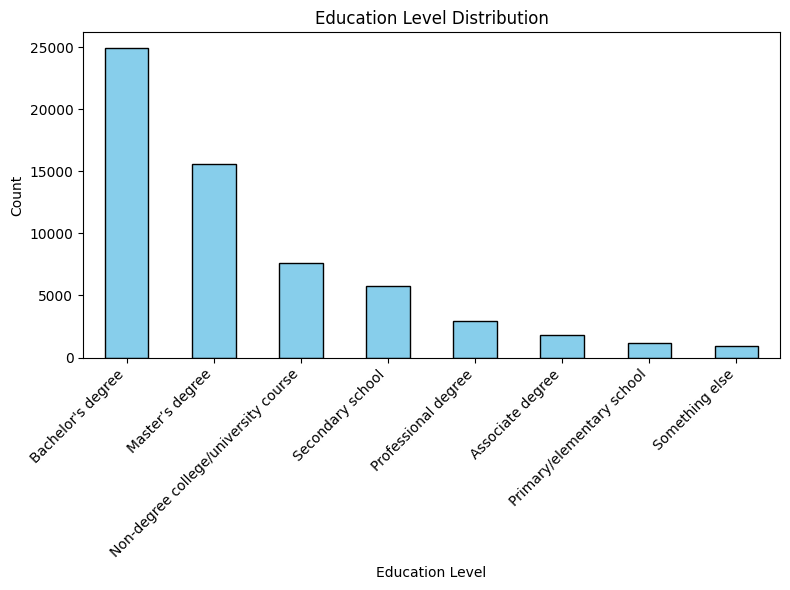

# Key Insights
- A significant portion of the developer community is pursuing either a Bachelor's or a Master's degree, with approximately 40,000 respondents out of the 60,000 people who mentioned their education level.
- There are also entries for primary and secondary schooling, suggesting that some individuals begin learning to program at an early age, although their numbers are relatively low.

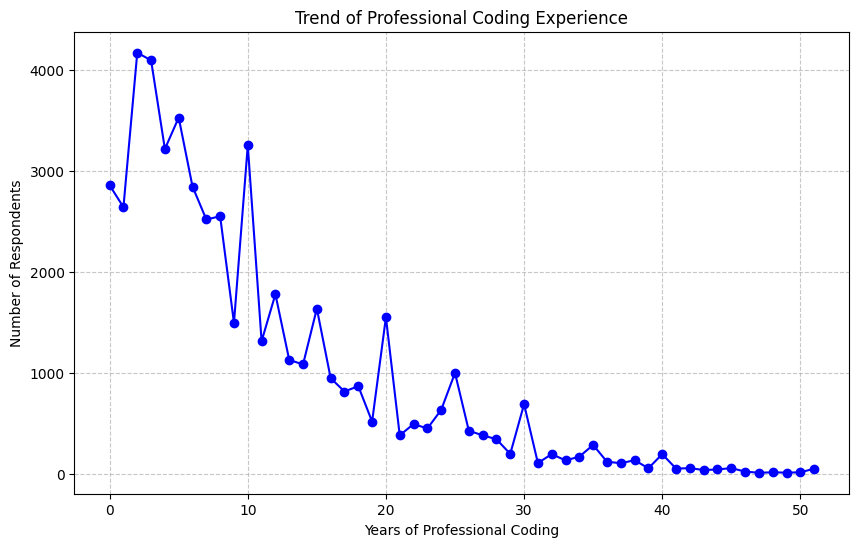

In [9]:
data = df['YearsCodePro'].replace('Less than 1 year', '0').replace('More than 50 years', '51').dropna().astype(int).value_counts().sort_index()
data

data.plot(kind='line', marker='o', color='blue', figsize=(10, 6))

plt.title('Trend of Professional Coding Experience')
plt.xlabel('Years of Professional Coding')
plt.ylabel('Number of Respondents')
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

<span style="font-size: 30px; line-height: 1.2; margin-bottom: 0; font-weight: bold;">Professional Coding Experience</span>

<span style="font-size: 18px; line-height: 1.2; margin-top: 0;">In this section, we will delve into analyzing the number of years of professional coding experience of developers who participated in the survey.
</span>

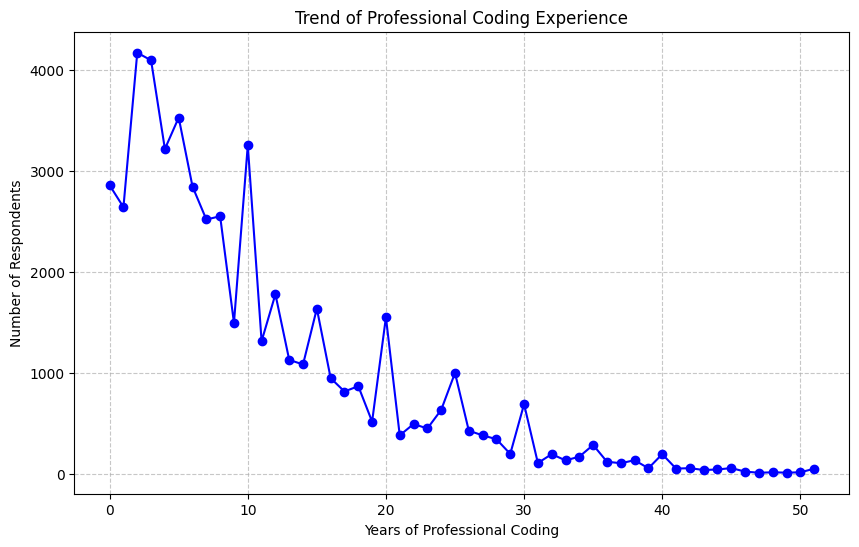

# Key Insights
- There is a continuous decrease in the number of developers as the years of experience increase.
- This indicates that there are fewer developers with more work experience.

# Programming tools and technologies

In this section, we will delve into the various programming tools and technologies that developers use in their daily workflows. This includes an analysis of the most popular programming languages, frameworks, DBMS, and other tools that are essential for modern software development. By understanding the tools and technologies favored by developers, we can gain insights into current trends and preferences within the tech industry.

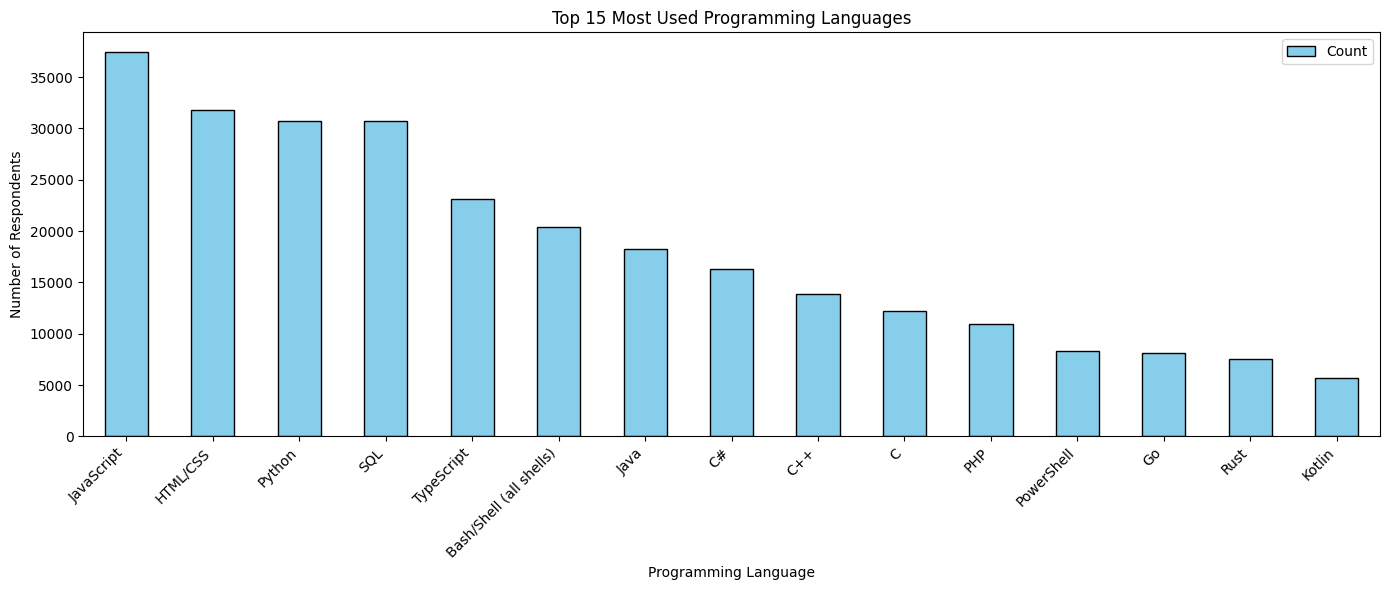

In [10]:
data = df['LanguageHaveWorkedWith']

data = data.dropna()

language_lists = data.str.split(';')

all_languages = [language for sublist in language_lists for language in sublist]

language_counts = Counter(all_languages)

language_df = pd.DataFrame(language_counts.items(), columns=['Language', 'Count'])
language_df = language_df.sort_values(by='Count', ascending=False)


language_df.set_index('Language').head(15).plot(
    kind='bar', 
    figsize=(14, 6), 
    color='skyblue', 
    edgecolor='black'
)

plt.title('Top 15 Most Used Programming Languages')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar graph illustrates the top 15 most used programming languages among survey respondents.

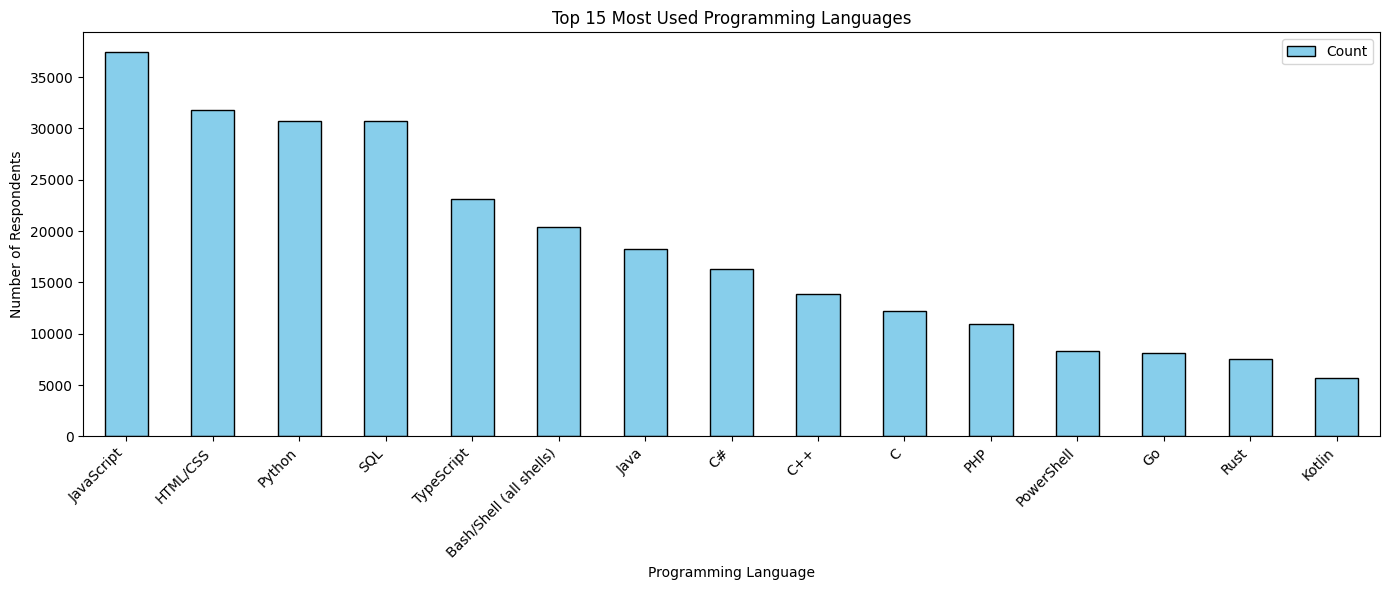

# Key Insights
- Javascript is the most popular programming language in 2024. The trend has been the same for almost a decade.
- Javascript is followed by HTML/CSS indicating that web development is the most pursued topic.
- Python and SQL are also among the top languages, highlighting their importance in data analysis and backend development.

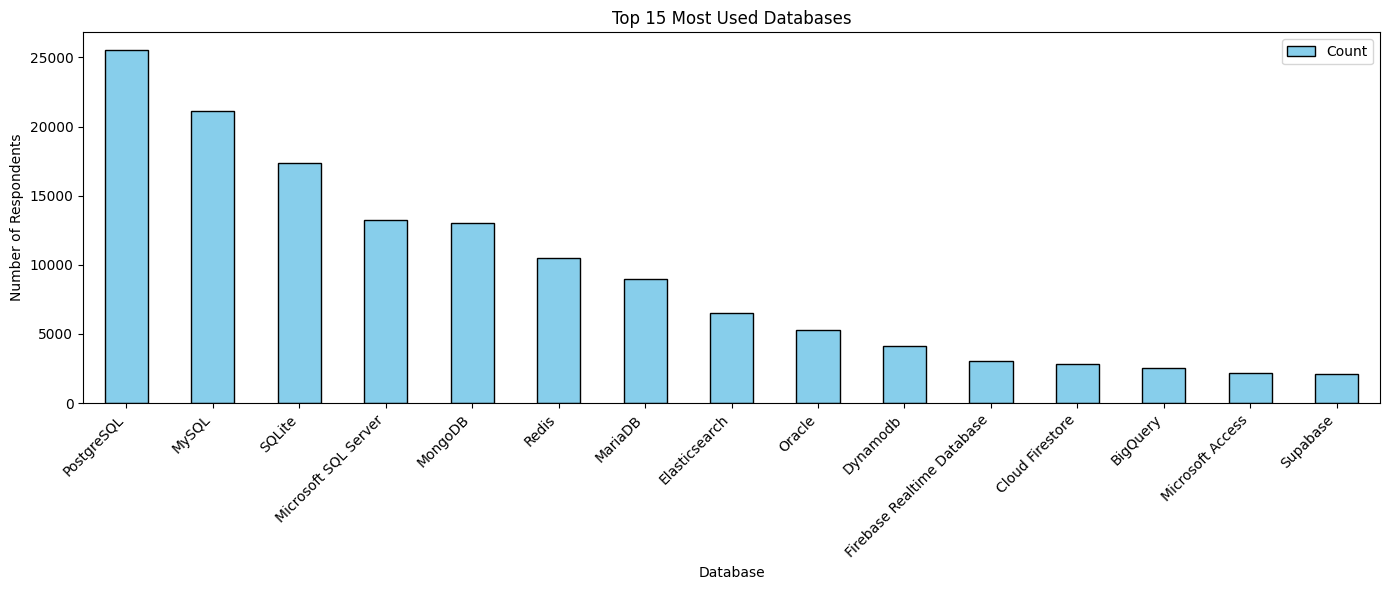

In [11]:
data = df['DatabaseHaveWorkedWith']

data = data.dropna()

database_lists = data.str.split(';')

all_databases = [database for sublist in database_lists for database in sublist]

database_counts = Counter(all_databases)

database_df = pd.DataFrame(database_counts.items(), columns=['Database', 'Count'])
database_df = database_df.sort_values(by='Count', ascending=False)

database_df.set_index('Database').head(15).plot(
    kind='bar', 
    figsize=(14, 6), 
    color='skyblue', 
    edgecolor='black'
)

plt.title('Top 15 Most Used Databases')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The bar graph shows the most used Databases in 2024

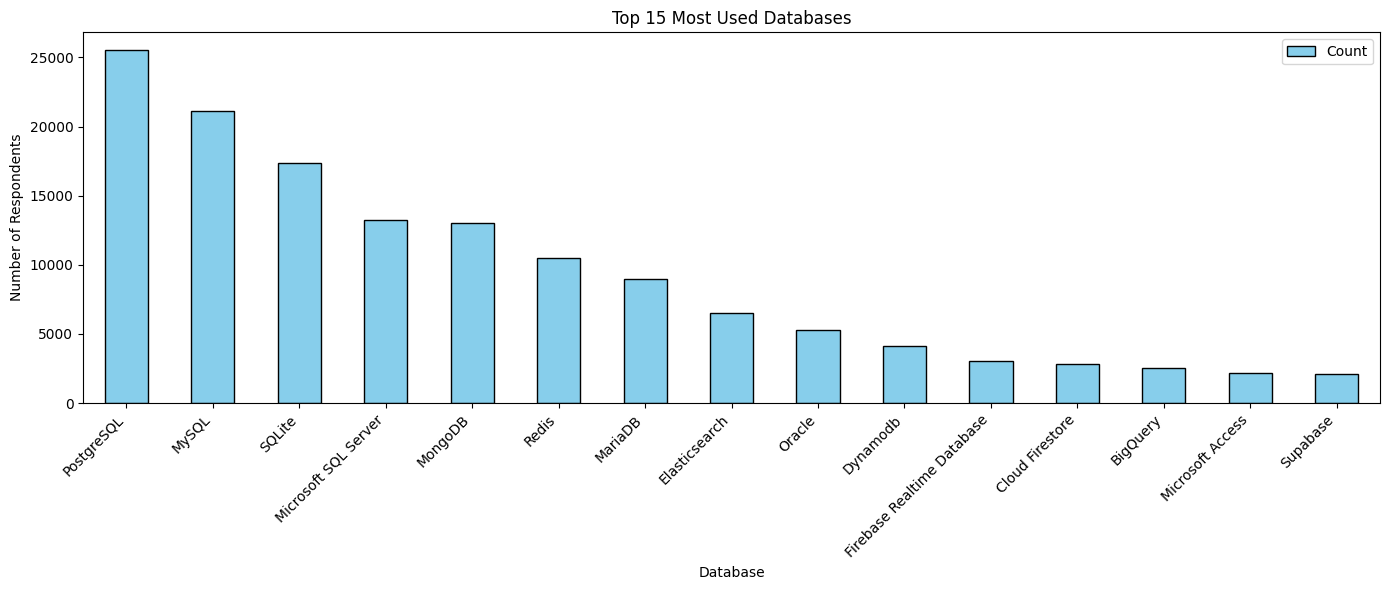

# Key Insights
- PostgreSQL is the most used database in 2024, followed by MySQL, SQLite, and Microsoft SQL Server, highlighting the popularity of SQL among developers.
- Dynamic databases like MongoDB, popular for web development, and Redis for in-memory data storage are also among the top choices.

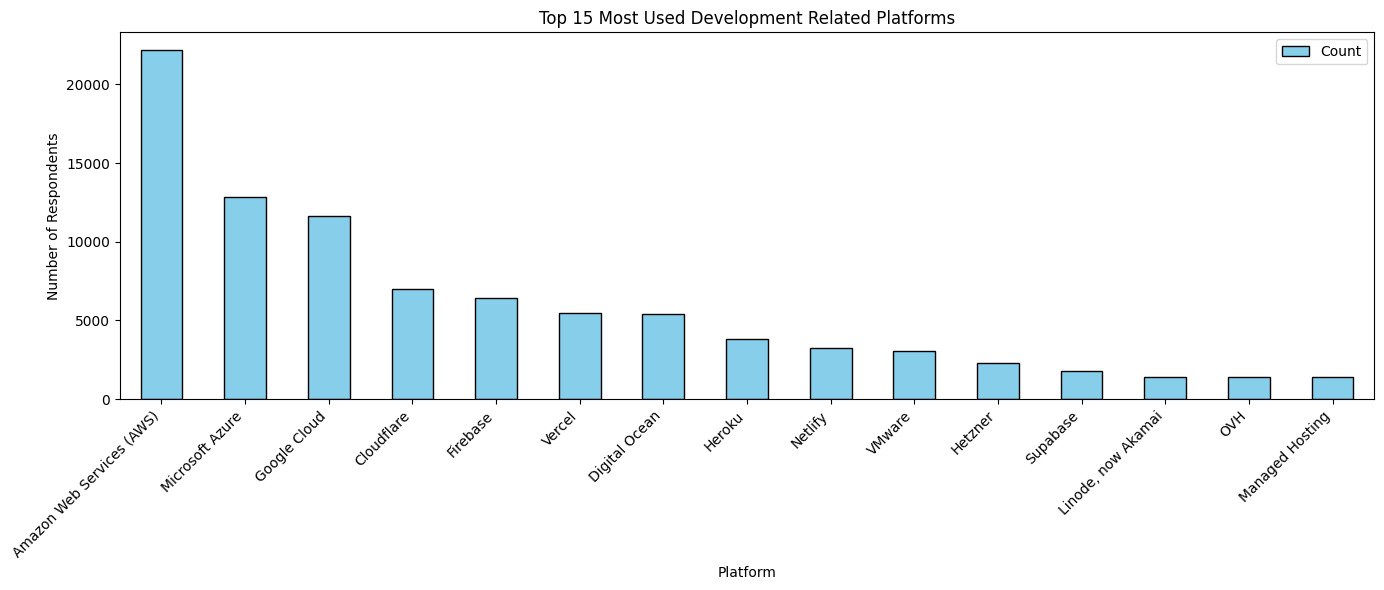

In [12]:
data = df['PlatformHaveWorkedWith']

data = data.dropna()

platform_lists = data.str.split(';')

all_platforms = [platform for sublist in platform_lists for platform in sublist]

platform_counts = Counter(all_platforms)

platform_df = pd.DataFrame(platform_counts.items(), columns=['Platform', 'Count'])
platform_df = platform_df.sort_values(by='Count', ascending=False)

platform_df.set_index('Platform').head(15).plot(
    kind='bar', 
    figsize=(14, 6), 
    color='skyblue', 
    edgecolor='black'
)

plt.title('Top 15 Most Used Development Related Platforms')
plt.xlabel('Platform')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The graph below shows the top 15 most used development-related platforms.

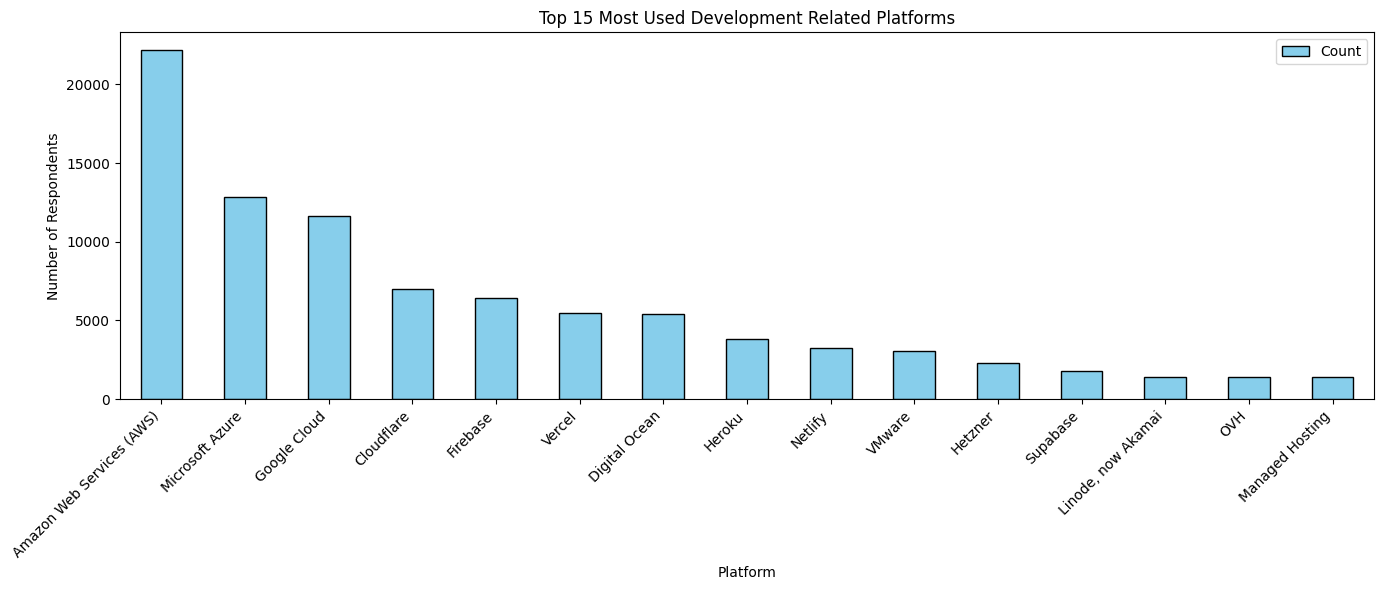

# Key Insights
- Amazon Web Services has significantly more users that any of it's competitor, having more than 22,000 developers working with it in 2024.  
- It is followed by Microsoft Azure and Google Cloud which also belong to the big names in the industry with around 12,000 users each.  

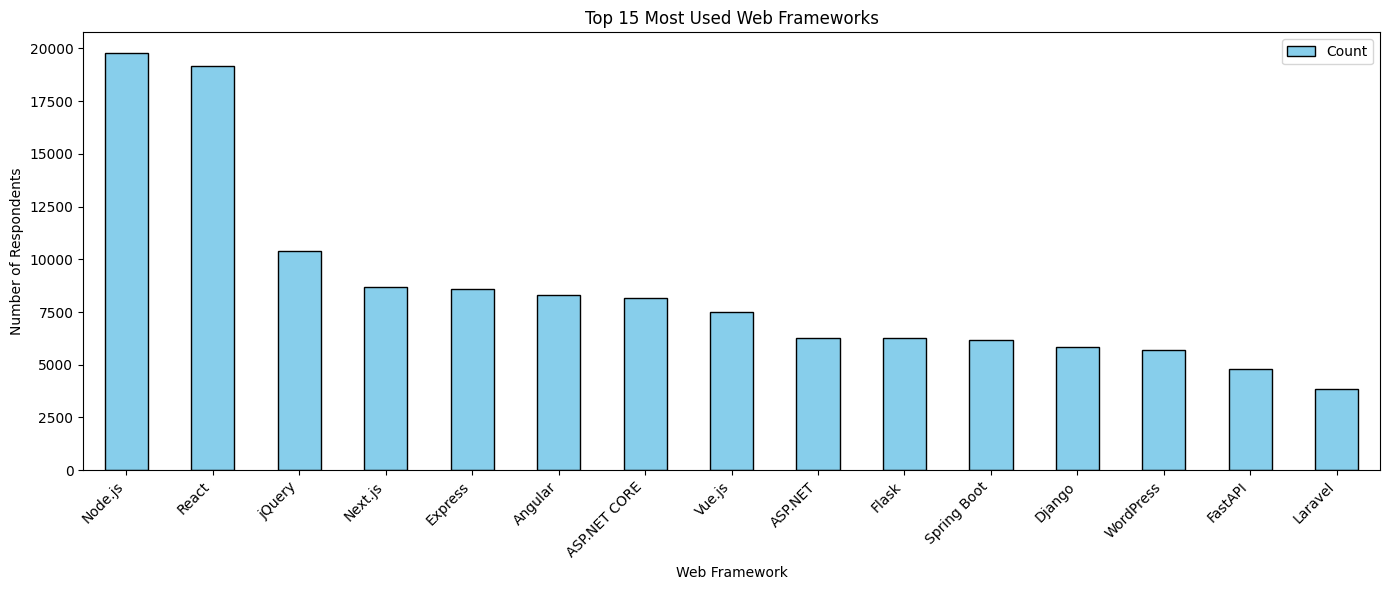

In [13]:
data = df['WebframeHaveWorkedWith']

data = data.dropna()

webframe_lists = data.str.split(';')

all_webframes = [webframe for sublist in webframe_lists for webframe in sublist]

webframe_counts = Counter(all_webframes)

webframe_df = pd.DataFrame(webframe_counts.items(), columns=['Webframe', 'Count'])
webframe_df = webframe_df.sort_values(by='Count', ascending=False)

webframe_df.set_index('Webframe').head(15).plot(
    kind='bar', 
    figsize=(14, 6), 
    color='skyblue', 
    edgecolor='black'
)

plt.title('Top 15 Most Used Web Frameworks')
plt.xlabel('Web Framework')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The graph below shows the top most used Web Frameworks in 2024

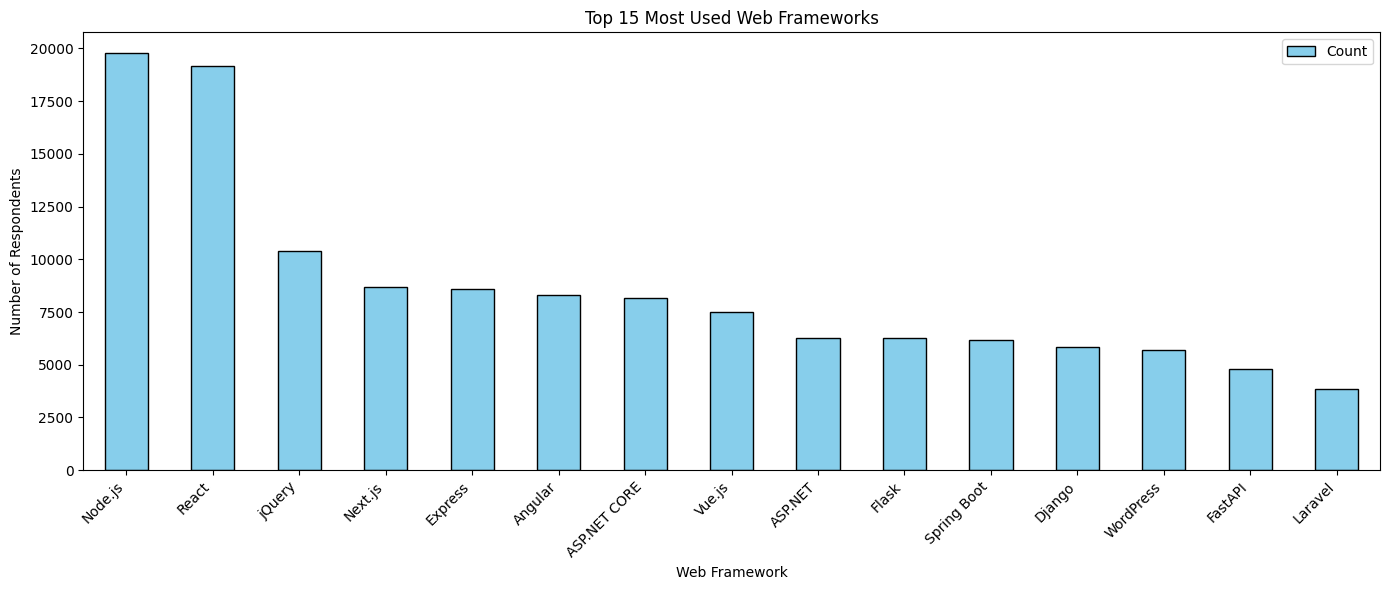

# Key Insights
- The most used web frameworks in 2024 are Node.js and React, highlighting the popularity of the MERN tech stack.
- These are followed by jQuery, Next.js, and Express, which are also widely used web frameworks.

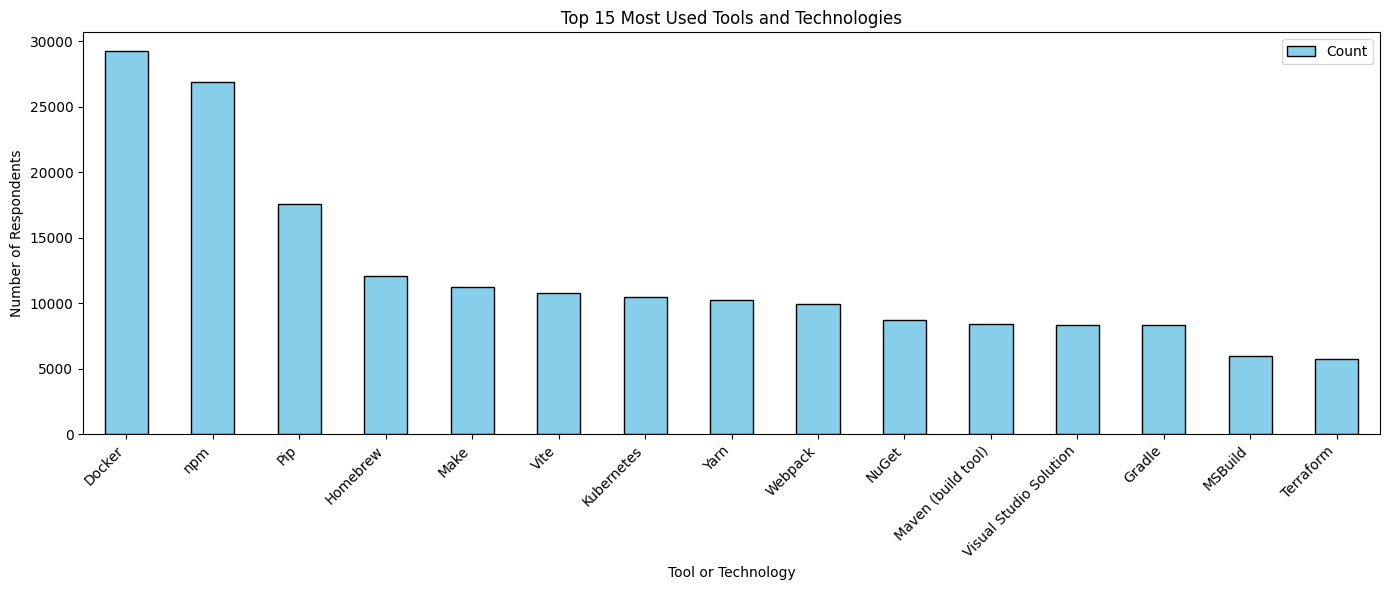

In [14]:
data = df['ToolsTechHaveWorkedWith']

data = data.dropna()

tool_lists = data.str.split(';')

all_tools = [tool for sublist in tool_lists for tool in sublist]

tool_counts = Counter(all_tools)

tool_df = pd.DataFrame(tool_counts.items(), columns=['Tool', 'Count'])
tool_df = tool_df.sort_values(by='Count', ascending=False)

tool_df.set_index('Tool').head(15).plot(
    kind='bar', 
    figsize=(14, 6), 
    color='skyblue', 
    edgecolor='black'
)

plt.title('Top 15 Most Used Tools and Technologies')
plt.xlabel('Tool or Technology')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The graph below shows the most used Tools and Technologies by the development industry.

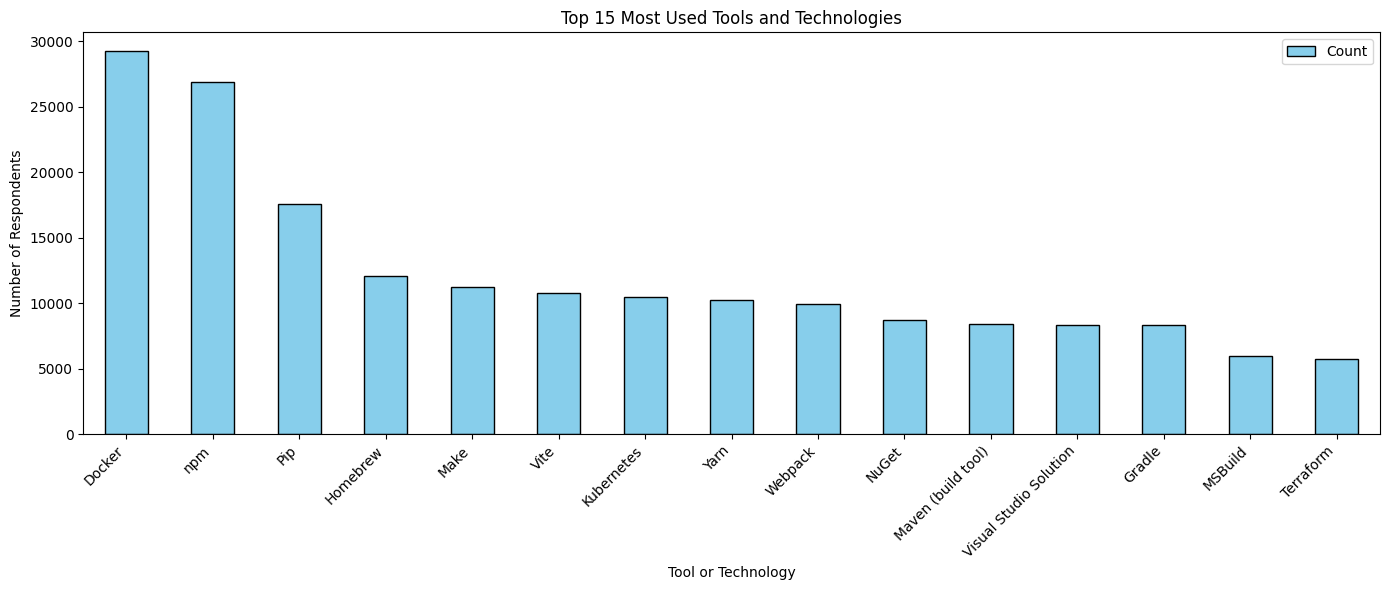

# Key Insights
- The most used tool is Docker, signifying the importance of faster testing and deployment of applications by isolating them from the system in Docker containers.
- It is followed by npm and pip, which are package managers for Node.js and Python respectively, highlight  ing the popularity of these ecosystems.

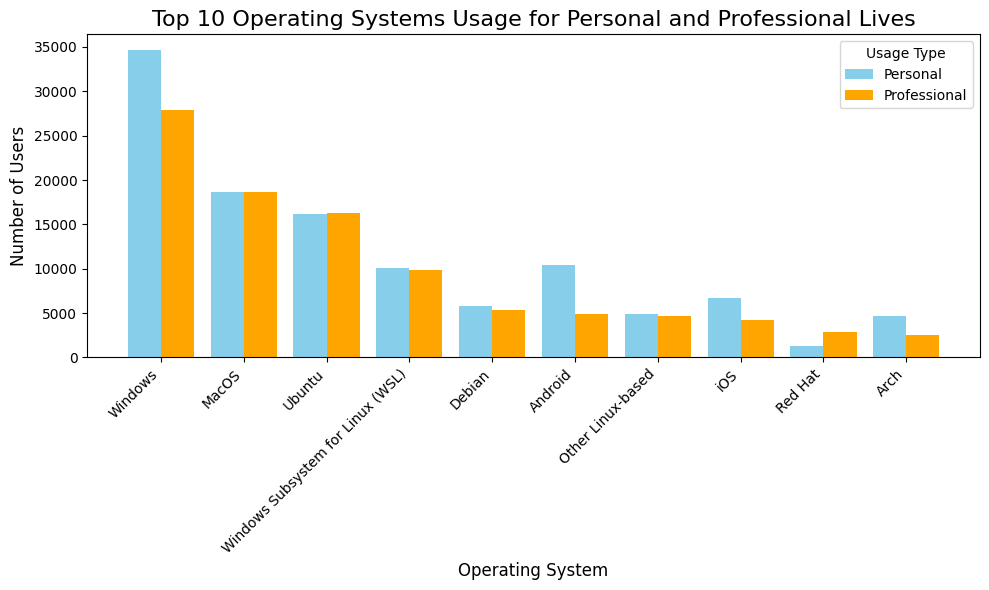

In [15]:
data = df['OpSysPersonal use']

data = data.dropna()

os_lists = data.str.split(';')

all_os = [os for sublist in os_lists for os in sublist]

os_counts = Counter(all_os)

data2 = df['OpSysProfessional use']

data2 = data2.dropna()

os_lists2 = data2.str.split(';')

all_os2 = [os for sublist in os_lists2 for os in sublist]

os_counts2 = Counter(all_os2)



sorted_os = sorted(os_counts2.items(), key=lambda x: x[1], reverse=True)[:10]

top_os = [os for os, _ in sorted_os]
personal_heights = [os_counts[os] for os in top_os]
professional_heights = [os_counts2[os] for os in top_os]

x = np.arange(len(top_os))  
bar_width = 0.4

plt.figure(figsize=(10, 6))

plt.bar(x - bar_width / 2, personal_heights, width=bar_width, label='Personal', color='skyblue')
plt.bar(x + bar_width / 2, professional_heights, width=bar_width, label='Professional', color='orange')

plt.xlabel('Operating System', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.title('Top 10 Operating Systems Usage for Personal and Professional Lives', fontsize=16)
plt.xticks(x, top_os, rotation=45, ha='right', fontsize=10)
plt.legend(title='Usage Type', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

The grouped bar chart below shows the most used operating systems for personal and professional use in 2024.  

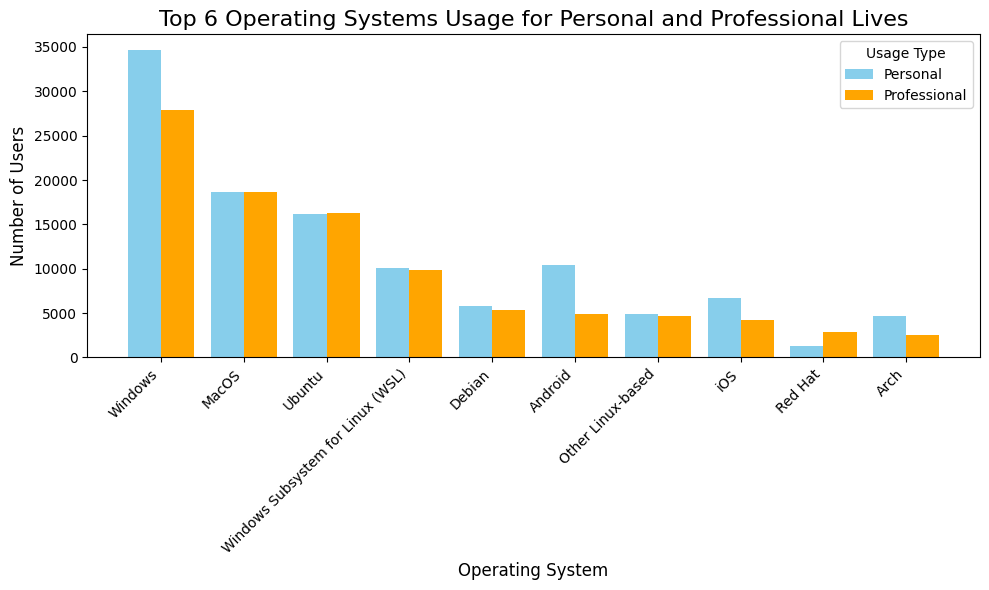

# Key Insights
- Windows continues to be the most used operating system for both, personal and professional use.
- Followed MacOS and Ubuntu, which are some of the most popular unix bases operating systems.
- We also see some mobile operating systems such as the Android and iOS.

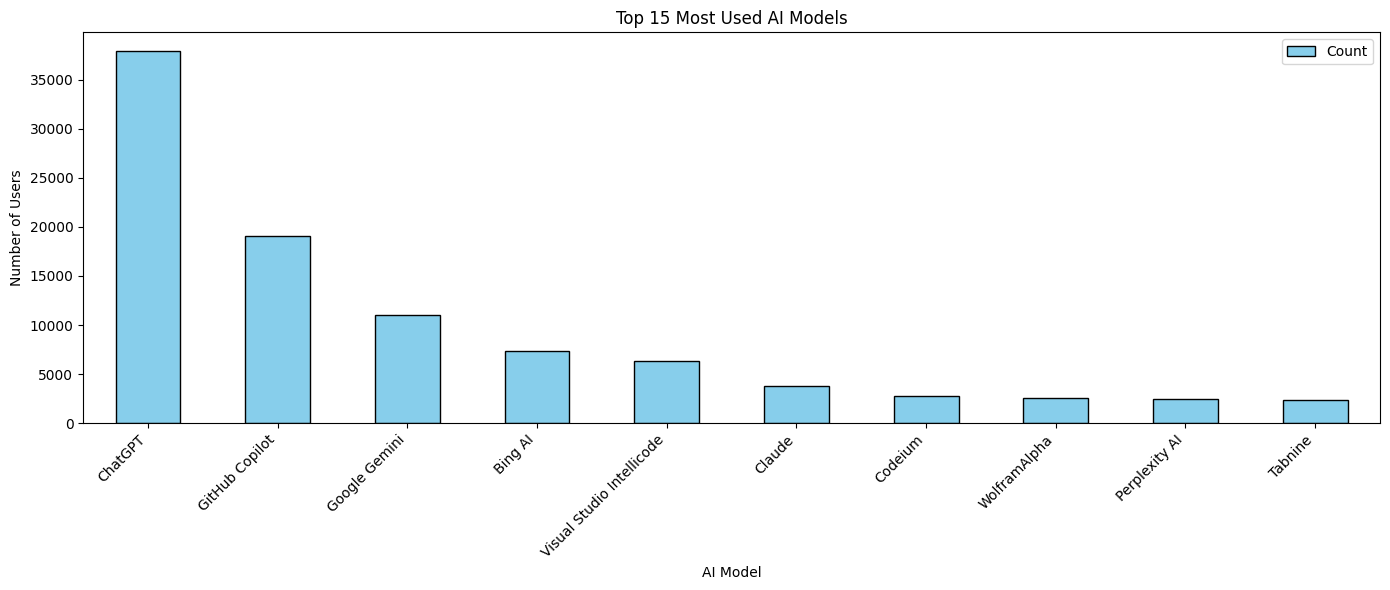

In [16]:
data = df['AISearchDevHaveWorkedWith']

data = data.dropna()

ai_lists = data.str.split(';')

all_ai = [ai for sublist in ai_lists for ai in sublist]

ai_counts = Counter(all_ai)

ai_df = pd.DataFrame(ai_counts.items(), columns=['AI/ML Framework', 'Count'])
ai_df = ai_df.sort_values(by='Count', ascending=False)

ai_df.set_index('AI/ML Framework').head(10).plot(
    kind='bar', 
    figsize=(14, 6), 
    color='skyblue', 
    edgecolor='black'
)

plt.title('Top 15 Most Used AI Models')
plt.xlabel('AI Model')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The graph below shows the most used AI models in 2024.  

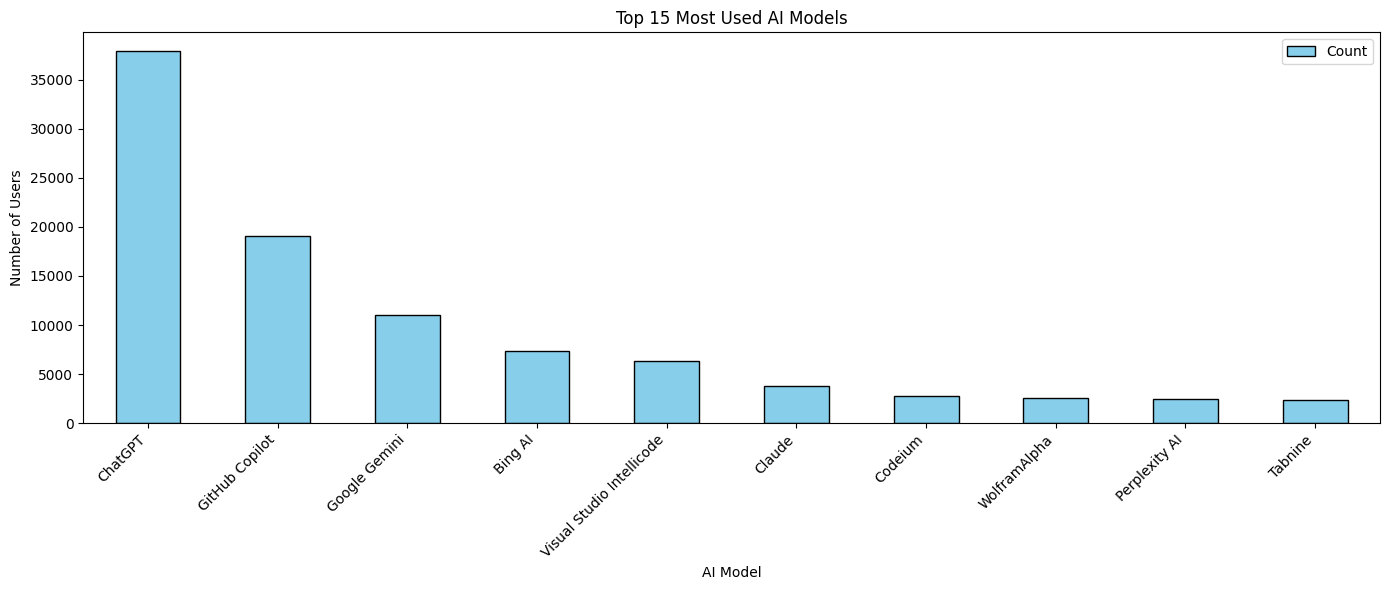

# Key Insights
- ChatGPT is the most used AI model in 2024. By offering some free features, OpenAI has attracted a large audience for their product.
- ChatGPT is followed by GitHub Copilot and Google Gemini, which are also efficient AI models.

# **Employment and Work Preferences**

In this section, we will explore the employment status and work preferences of developers. This includes an analysis of their job roles, work environments, remote work trends, and factors influencing job satisfaction. By understanding these aspects, we can gain insights into the professional lives of developers and the evolving nature of work in the tech industry.

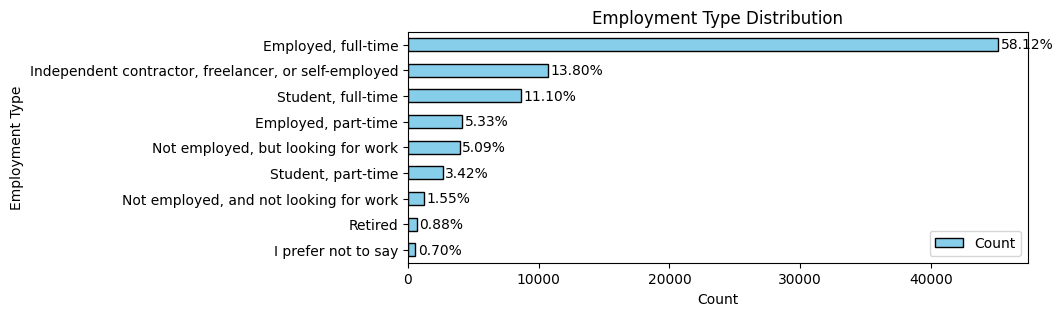

In [17]:
data = df['Employment']

data = data.dropna()

emp_lists = data.str.split(';')

all_emp = [emp for sublist in emp_lists for emp in sublist]

emp_counts = Counter(all_emp)

emp_df = pd.DataFrame(emp_counts.items(), columns=['Employment Type', 'Count'])
emp_df = emp_df.sort_values(by='Count', ascending=True)

total_count = emp_df['Count'].sum()
emp_df['Percentage'] = (emp_df['Count'] / total_count) * 100

ax = emp_df.set_index('Employment Type').plot.barh(
    y='Count', 
    color='skyblue', 
    edgecolor='black', 
    figsize=(8, 3)
)

for i in ax.patches:
    ax.text(i.get_width() + 200, i.get_y() + i.get_height() / 2, 
            f'{(i.get_width() / total_count) * 100:.2f}%', 
            ha='left', va='center')

plt.title('Employment Type Distribution')
plt.xlabel('Count')
plt.ylabel('Employment Type')
plt.show()

First off, we will see the employment rates. The pie chart below shows the employment rates in the development industry.

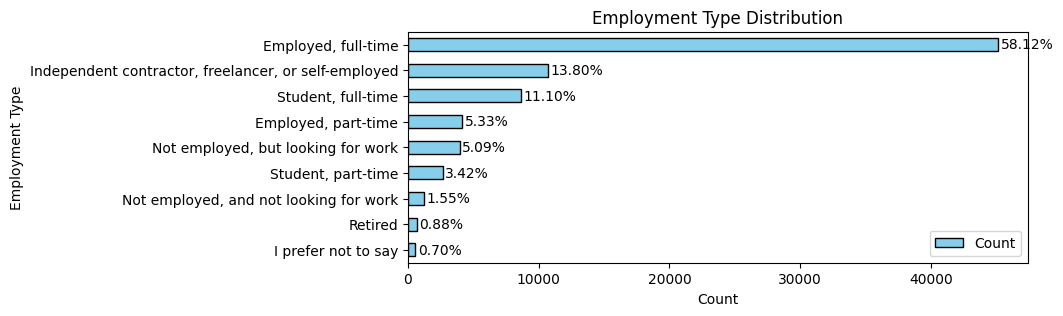

# Key Insights
- A lot of the respondents say that they are employed full time, amounting to almost 58%.  
- 11.1% of the respondents are full time students.
- Almost 5% of the respondents are unemployed but are open to work opportunities, unlike the 1.5% of the unemployed developers who are not looking for work.

<Figure size 1500x2500 with 0 Axes>

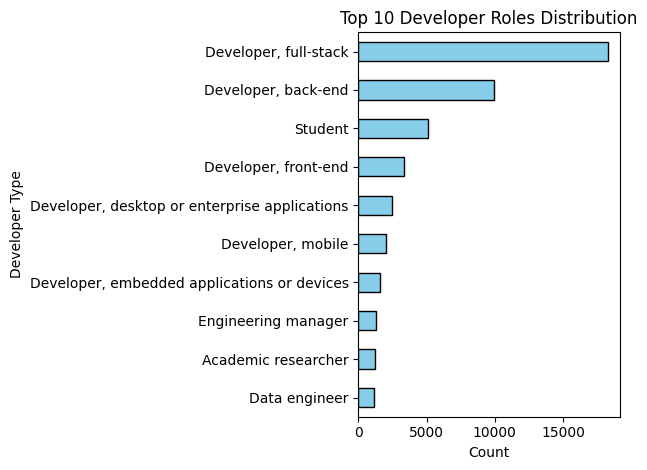

In [18]:
data = df['DevType']

data = data.dropna()

dev_count = Counter(data)

dev_count.pop('Other (please specify):', None)

dev_df = pd.DataFrame(dev_count.items(), columns=['Developer Type', 'Count'])
dev_df = dev_df.sort_values(by='Count', ascending=True).tail(10)

plt.figure(figsize=(15, 25)) 
dev_df.set_index('Developer Type').plot(kind='barh', color='skyblue', edgecolor='black', legend=False)

plt.title('Top 10 Developer Roles Distribution')
plt.xlabel('Count')
plt.ylabel('Developer Type')
plt.tight_layout()
plt.show()


Let's now look at what job roles are most popular

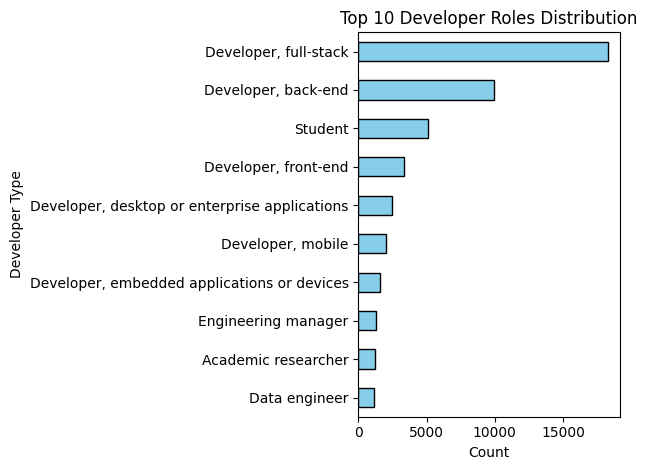

# Key Insights
- Most developers are full-stack, indicating the demand for versatility in the software development industry.
- This is followed by back-end developers, whose numbers are significantly higher than front-end developers. This could be due to the availability of many new front-end development tools and services in the market.
- There are quite a number of students among the respondents, indicating a strong interest in software development among students.

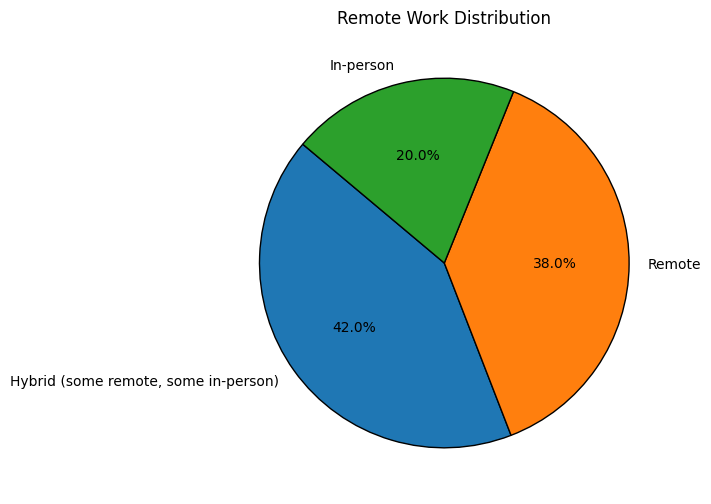

In [19]:
data = df['RemoteWork']

data = data.dropna()

work_counts = Counter(data)

work_df = pd.DataFrame(work_counts.items(), columns=['Work Type', 'Count'])
work_df = work_df.sort_values(by='Count', ascending=False)

work_df.set_index('Work Type').plot.pie(
    y='Count', 
    autopct='%1.1f%%', 
    figsize=(6,6), 
    startangle=140, 
    legend=False, 
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Remote Work Distribution')
plt.ylabel('')
plt.show()

This is a pie chart below that displays data about work environments of the developer population. 

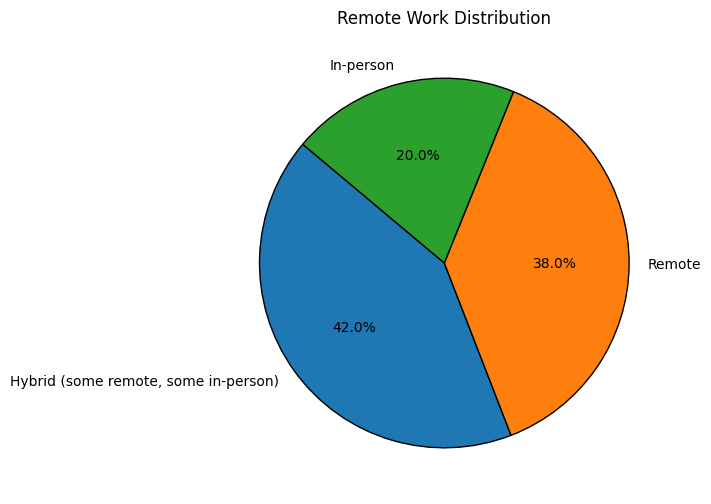

# Key Insights
- Majority of the developers work in hybrid environments.  
- 38% of developers have strict remote jobs and 20% of developers have strict In-person jobs.  

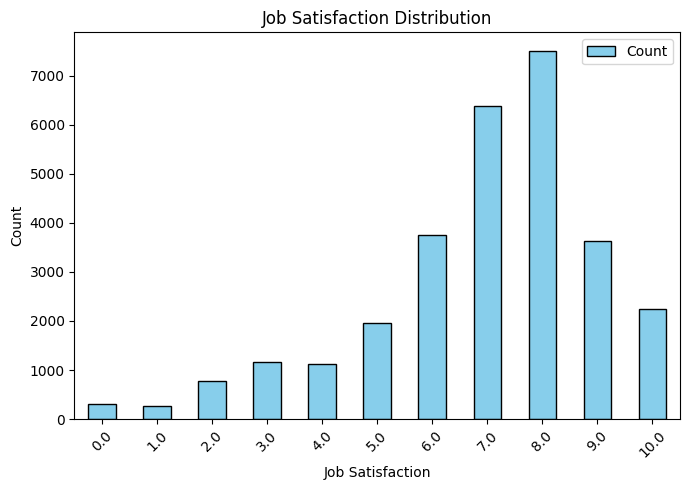

In [20]:
data = df['JobSat']

data = data.dropna()

job_sat_counts = Counter(data)

job_sat_df = pd.DataFrame(job_sat_counts.items(), columns=['Job Satisfaction', 'Count'])

job_sat_df = job_sat_df.sort_values(by='Job Satisfaction', ascending=True)

job_sat_df.set_index('Job Satisfaction').plot(
    kind='bar', 
    color='skyblue', 
    edgecolor='black', 
    figsize=(7,5)
)

plt.title('Job Satisfaction Distribution')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The graph below shows the rating out of 10 that respondents give to their developer role, conveying about how satisfied they are with their position.

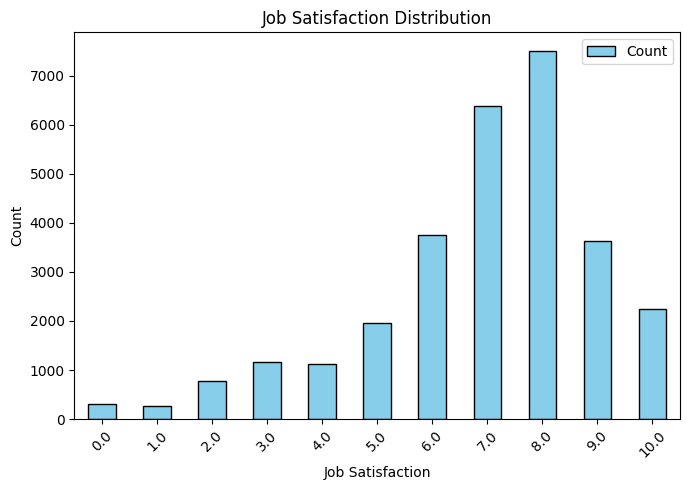

# Key Insights
- The majority of developers rate their job satisfaction 8 out of 10, which is a positive response.
- Other popular ratings are 7/10, 6/10, 9/10, and 10/10, indicating a generally high level of job satisfaction in the software development industry.

<span style="font-size: 30px; line-height: 1.2; margin-bottom: 0; font-weight: bold;">Total Annual Compensation</span>

<span style="font-size: 18px; line-height: 1.2; margin-top: 0;">Below are listed the Total Annual Compensation of top 5 countries in terms of number of responses
- United States of America - $147,000 or ₹1,09,62,000
- Germany - €69,000 or ₹61,38,000
- India - ₹13,00,000
- United Kingdom and Northern Ireland - £67,000 or ₹67,00,000
- Ukraine - ₴66,000 or ₹1,82,160
</span>


# Wrapping Up
- We explored a wealth of survey data and gained valuable insights into the developer community.
- However, survey results are not always fully accurate, so it's important to consider them as indicative rather than absolute facts.
- The data provided a comprehensive overview of various aspects such as demographics, tools, technologies, and work environments.
- These insights can help us understand current trends and make informed decisions in the tech industry.
- Thank you for following along with this analysis. I hope you found it informative and engaging.

# Presented By -
Hirdyansh Kanethia

## Contact Information- 
[LinkedIN](https://www.linkedin.com/in/hirdyansh-k/)  
[Github](https://github.com/hirdyanshKanethia)  
[X](https://x.com/hirdyansh_K)  
